# Inpainting using Dall-E
Inpainting is the task of replacing a selected part of an image by generated pixels that make the selection disappear. When working with scientific images, this could be seen as scientific misconduct. Be careful when applying this technique to your microscopy images.

In this notebook we will use [Dall-E 2](https://openai.com/dall-e-2) to inpaint a region of an image. For convenience reasons, we will use the [Darth-D](https://github.com/haesleinhuepf/darth-d/) library to process the image.

In [1]:
from darth_d import replace

from skimage.io import imread
import stackview
import numpy as np

In this example we aim to replace the cell in the lower middle of this image.

StackViewNDArray([[[ 3,  6,  1],
                   [ 3,  7,  0],
                   [ 3,  6,  1],
                   ...,
                   [11,  8,  2],
                   [11,  7,  2],
                   [11, 11,  2]],

                  [[ 3,  6,  1],
                   [ 3,  8,  1],
                   [ 3,  7,  1],
                   ...,
                   [11, 10,  2],
                   [10, 10,  2],
                   [11, 11,  2]],

                  [[ 4,  6,  1],
                   [ 3,  6,  1],
                   [ 4,  6,  1],
                   ...,
                   [10, 10,  2],
                   [11, 10,  2],
                   [11, 10,  2]],

                  ...,

                  [[15, 14,  8],
                   [14, 14,  8],
                   [15, 14,  7],
                   ...,
                   [10, 11,  5],
                   [10, 12,  4],
                   [11, 14,  5]],

                  [[14, 16,  7],
                   [16, 15,  7],
                   [15, 16,  8],
                   ...,
                   [10, 11,  4],
                   [11, 13,  4],
                   [11, 16,  5]],

                  [[15, 18,  7],
                   [14, 17,  8],
                   [14, 17,  8],
                   ...,
                   [ 9, 12,  5],
                   [10, 13,  5],
                   [11, 15,  5]]], dtype=uint8)
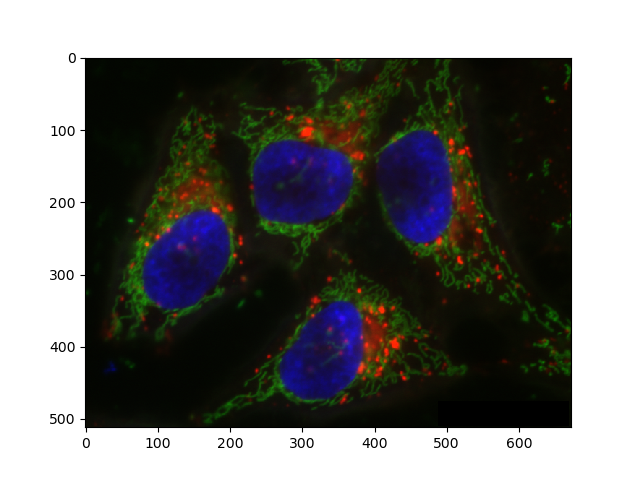
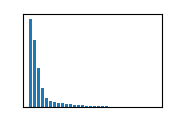

In [2]:
input_image = imread("../../data/hela-cells-8bit.tif")

stackview.insight(input_image)

We mark this cell using a binary mask.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
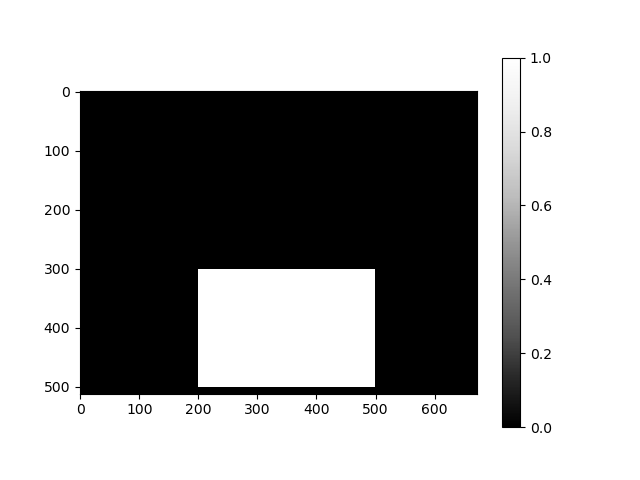
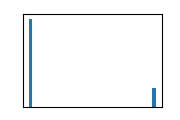

In [3]:
mask = np.zeros(input_image.shape[:2], dtype=np.uint8)
mask[300:500, 200:500] = 1

stackview.insight(mask)

We then call the `replace` function to generate a new image.

C:\Users\haase\mambaforge\envs\t310\lib\site-packages\darth_d\_replace.py:41: UserWarning: Using the replace function on scientific images could be seen as scientific misconduct. Handle this function with care.
  warn("Using the replace function on scientific images could be seen as scientific misconduct. Handle this function with care.")


StackViewNDArray([[[ 3,  6,  0],
                   [ 3,  6,  0],
                   [ 3,  6,  0],
                   ...,
                   [10,  8,  2],
                   [10,  7,  2],
                   [10,  9,  2]],

                  [[ 3,  6,  0],
                   [ 3,  6,  0],
                   [ 3,  6,  0],
                   ...,
                   [10,  9,  2],
                   [10,  9,  2],
                   [10,  9,  2]],

                  [[ 3,  6,  0],
                   [ 3,  6,  0],
                   [ 3,  6,  0],
                   ...,
                   [10,  9,  2],
                   [10,  9,  2],
                   [10,  9,  2]],

                  ...,

                  [[13, 14,  6],
                   [13, 14,  6],
                   [14, 14,  7],
                   ...,
                   [ 8,  9,  3],
                   [ 9, 11,  3],
                   [ 9, 12,  3]],

                  [[14, 15,  7],
                   [14, 14,  7],
                   [14, 15,  7],
                   ...,
                   [ 9, 10,  3],
                   [ 9, 12,  4],
                   [ 9, 14,  4]],

                  [[14, 16,  7],
                   [14, 16,  7],
                   [14, 15,  7],
                   ...,
                   [ 9, 11,  3],
                   [ 9, 12,  4],
                   [10, 14,  4]]], dtype=uint8)
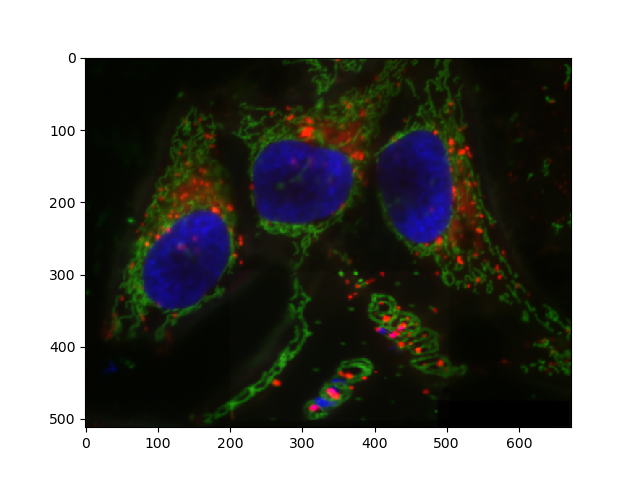
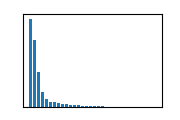

In [4]:
new_image = replace(input_image, mask)

stackview.insight(new_image)

In [5]:
stackview.curtain(input_image, new_image, zoom_factor=0.5)

## Exercise
Load `../../data/blobs.tif` draw a binary mask sized 100x100 pixels in the center of the image and inpaint it.